In [48]:
#### First, you should import libraires.
#### 

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
### for the color
import termcolor
todo=termcolor.colored('TO DO', color='red')


# I - Data reading & splitting
from keras.datasets import mnist

# 1) load data from MNIST Dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

# Input image format
rows, cols, channels = 28,28,1

# 2) What does "x_train", "y_train", "x_test" and "y_test" present ?
# 3) Reshape "x_train" and "x_test" according to the input image format

x_train = x_train.reshape(60000,28,28,1 )
x_test = x_test.reshape(10000,28,28,1 )
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
#normalization

#4)Display the number of images in train and test sets

print(x_train.shape, 'train samples')
print(x_test.shape, 'test samples')

(60000, 28, 28)
(60000, 28, 28, 1) train samples
(10000, 28, 28, 1) test samples


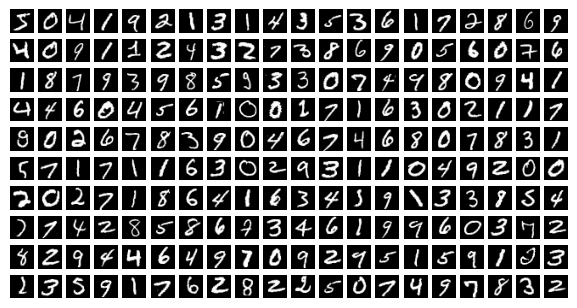

In [49]:
# II - Data visualisation

#1) Which library is required to  display images
import matplotlib.pyplot as plt

#2) Complete the script to display the first 200 images from the MNIST dataset

plt.figure(figsize=(7.195, 3.841), dpi=100)

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(x_train[i].reshape([28,28]), cmap='gray')
    plt.axis('off')


In [51]:
#III - Model Architecture 
import tensorflow
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28,28,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 dropout_15 (Dropout)        (None, 12, 12, 64)        0         
                                                                 
 flatten_9 (Flatten)         (None, 9216)              0         
                                                                 
 dense_21 (Dense)            (None, 128)               1179776   
                                                      

In [52]:
# IV - Fiting
from keras.utils import np_utils  
# 1) convert labels to categorical type

num_classes=10
y_train =keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# 2) complete the following command to fit the Deep neural model.
# 3) select the hyperparameters values

model_log=model.fit(x_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_split=0.3
)



Epoch 1/10
329/329 [==============================] - 7s 19ms/step - loss: 2.2852 - accuracy: 0.1320 - val_loss: 2.2547 - val_accuracy: 0.2633
Epoch 2/10
329/329 [==============================] - 6s 18ms/step - loss: 2.2423 - accuracy: 0.2125 - val_loss: 2.2031 - val_accuracy: 0.3951
Epoch 3/10
329/329 [==============================] - 6s 17ms/step - loss: 2.1911 - accuracy: 0.3023 - val_loss: 2.1398 - val_accuracy: 0.5227
Epoch 4/10
329/329 [==============================] - 6s 18ms/step - loss: 2.1264 - accuracy: 0.3816 - val_loss: 2.0586 - val_accuracy: 0.6045
Epoch 5/10
329/329 [==============================] - 6s 18ms/step - loss: 2.0430 - accuracy: 0.4501 - val_loss: 1.9561 - val_accuracy: 0.6588
Epoch 6/10
329/329 [==============================] - 5s 17ms/step - loss: 1.9447 - accuracy: 0.4991 - val_loss: 1.8342 - val_accuracy: 0.6860
Epoch 7/10
329/329 [==============================] - 6s 18ms/step - loss: 1.8292 - accuracy: 0.5360 - val_loss: 1.6934 - val_accuracy: 0.7056

In [54]:
# V - Evaluate the model

# 1) complete the command to evaluate the model 

score = model.evaluate(x_test,y_test, verbose=0)

# 2) complete the command to display model performance

print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.2396931648254395
Test accuracy: 0.7731000185012817


In [55]:
from sklearn.metrics import confusion_matrix  
import numpy as np
#### To analyze results, plot the confusion matrix using the following command
#Predict the test results

predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)

y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[ 931    0    4    3    0    0   20    1   21    0]
 [   0 1081    4    6    0    0   22    0   19    3]
 [  26   17  808   56    8    0   68   28   20    1]
 [  14    9   56  863    0    1   11   24   20   12]
 [   2   14    3    0  792    0   68   15   11   77]
 [  77   17   17  220   22  244   68   17  185   25]
 [  39   11   13    0   10    3  877    0    5    0]
 [   6   47   16    0   12    0    6  906   11   24]
 [  28   44   27   96   14    1   31   49  648   36]
 [  24   27    5   14  185    0    3  156   14  581]]


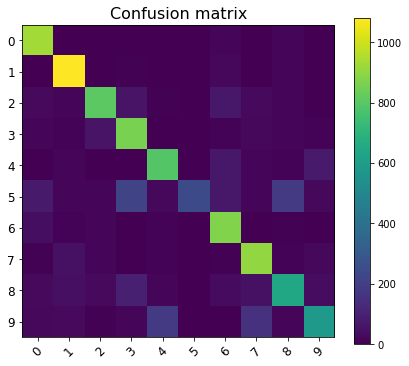

In [56]:
# confusion matrix and accuracy
mnist_classes= ['0','1','2','3','4','5','6','7','8','9']
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_labels,y_predict))
plt.xticks(np.arange(10), mnist_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), mnist_classes, fontsize=12)
plt.colorbar()
plt.show()


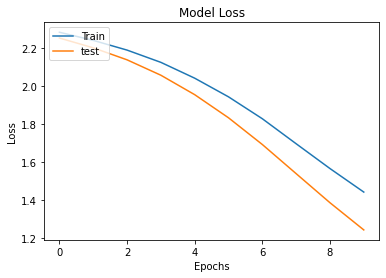

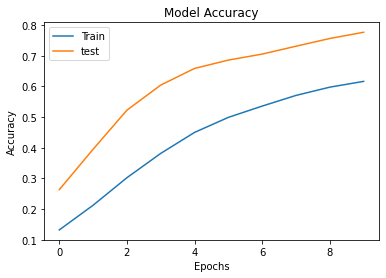

In [57]:
import matplotlib.pyplot as plt

legend = ['Train', 'test']
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(legend, loc='upper left')
plt.show()

legend = ['Train', 'test']
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(legend, loc='upper left')
plt.show()

In [58]:
# VI - Create a new model and evaluate its performance
import tensorflow
def New_model():
    # 1) create model
    model = Sequential()
    model.add(Conv2D(30, kernel_size=(5, 5),
                 activation='relu',
                 input_shape=(28,28,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, kernel_size=(3, 3),
                 activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.20))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    


#1) In a seperate paper and for each model layer, specify the input/output dimensions
#2) Verify your proposition using a predefined command

    model.summary()
    # Compile model
    model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=tensorflow.keras.optimizers.Adadelta(),
              metrics=['accuracy'])
    return model


# 2) Model evaluation
# build the model
model = New_model()
# Fit the model
model_log=model.fit(x_train, y_train, validation_split=0.3, epochs=10, batch_size=200)
# Final evaluation of the model
scores = model.evaluate(x_test, y_test, verbose=0)
print("New Model Error: %.2f%%" % (100-scores[1]*100))
print('Test loss:',score[0] )
print('Test accuracy:',score[1] )

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 30)        780       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 12, 30)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 10, 10, 15)        4065      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 5, 5, 15)         0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 5, 5, 15)          0         
                                                                 
 flatten_10 (Flatten)        (None, 375)             

In [59]:
from sklearn.metrics import confusion_matrix  

#### To analyze results, plot the confusion matrix using the following command
#Predict the test results
predict_x=model.predict(x_test) 
y_predict=np.argmax(predict_x,axis=1)

y_test_labels = y_test.argmax(1)
#confusion matrix and classification report
print("Confusion Matrix\n",confusion_matrix(y_test_labels,y_predict))

Confusion Matrix
 [[  0   6   0   0   0   0 808 163   3   0]
 [  0 763   1   0   1   0 330   2  38   0]
 [  0   9  34   0   1   0 929  58   1   0]
 [  0  27  55   0   1   0 917  10   0   0]
 [  0  13   0   0  36   0 635 297   1   0]
 [  0 121   2   0  15   0 659  90   5   0]
 [  0  43   0   0   0   0 899  16   0   0]
 [  0   6   0   0   7   0 757 253   5   0]
 [  0  45   1   0  24   0 762 119  23   0]
 [  0  14   0   0  16   0 877 102   0   0]]


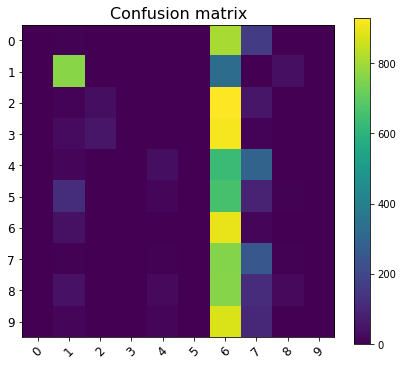

In [60]:
# confusion matrix and accuracy
mnist_classes= ['0','1','2','3','4','5','6','7','8','9']
from sklearn.metrics import confusion_matrix, accuracy_score
plt.figure(figsize=(7, 6))
plt.title('Confusion matrix', fontsize=16)
plt.imshow(confusion_matrix(y_test_labels,y_predict))
plt.xticks(np.arange(10), mnist_classes, rotation=45, fontsize=12)
plt.yticks(np.arange(10), mnist_classes, fontsize=12)
plt.colorbar()
plt.show()


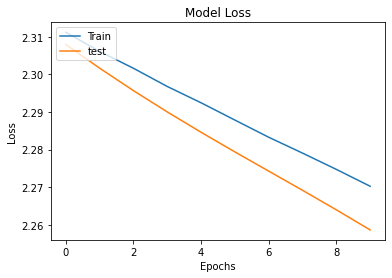

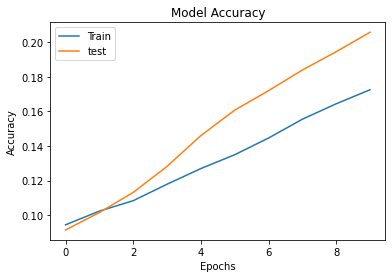

In [61]:
import matplotlib.pyplot as plt

legend = ['Train', 'test']
plt.plot(model_log.history['loss'])
plt.plot(model_log.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(legend, loc='upper left')
plt.show()

legend = ['Train', 'test']
plt.plot(model_log.history['accuracy'])
plt.plot(model_log.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(legend, loc='upper left')
plt.show()